# Exploratory Data Analysis on the dataset 'Heart Failure Prediction'

In [1]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import xgboost

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
%matplotlib inline 


#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  
from sklearn import tree

In [2]:
df=pd.read_csv("D:\\data_science course\\project_fr_resume\\heart failure prediction\\heart_failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Preprocessing

In [3]:
# number of rows and column in dataset
##Handling missing values
df.info()
df.shape
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


No null values present in the data.

# Exploratory Data Analysis

C:\Users\DELL\anaconda3\envs\yogita\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Negative(0):  203
Positive(0):  96


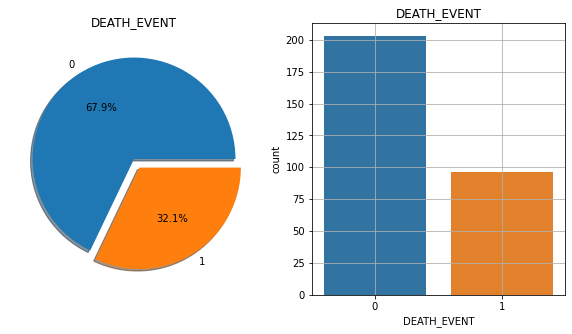

In [4]:
# outcome of count plot
f,ax=plt.subplots(1,2,figsize=(10,5))
df['DEATH_EVENT'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('DEATH_EVENT')
ax[0].set_ylabel('')
sns.countplot('DEATH_EVENT',data=df,ax=ax[1])
ax[1].set_title('DEATH_EVENT')
N,P=df['DEATH_EVENT'].value_counts()
print('Negative(0): ',N)
print('Positive(0): ',P)
plt.grid()
plt.show()

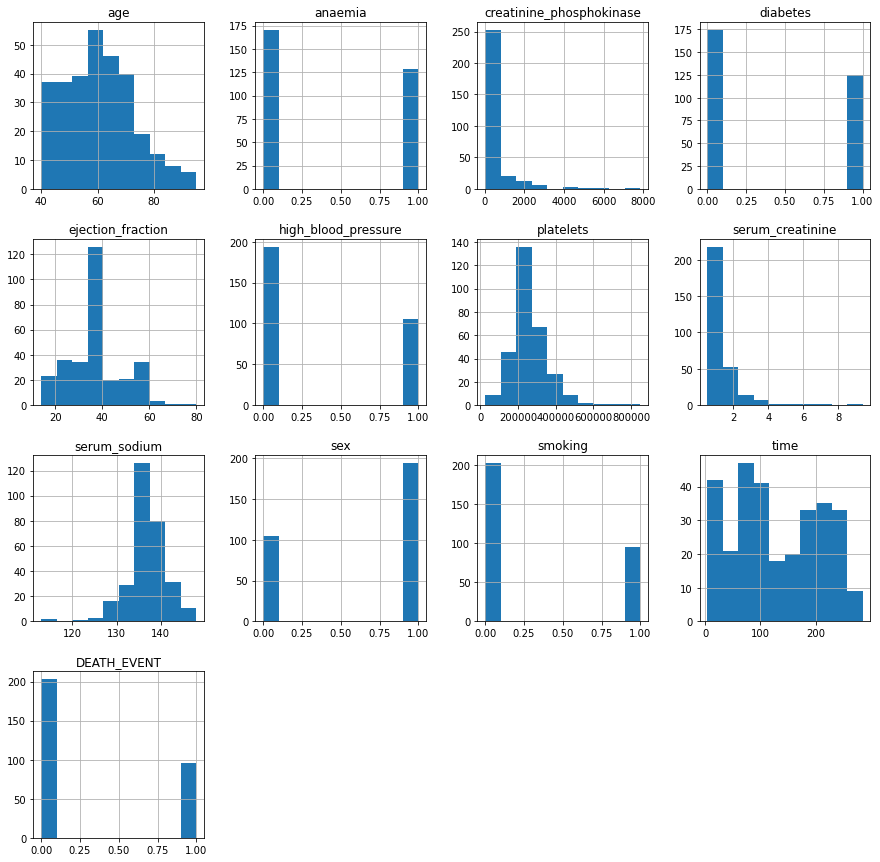

In [5]:
df.hist(bins=10,figsize=(15,15))
plt.show()

<AxesSubplot:>

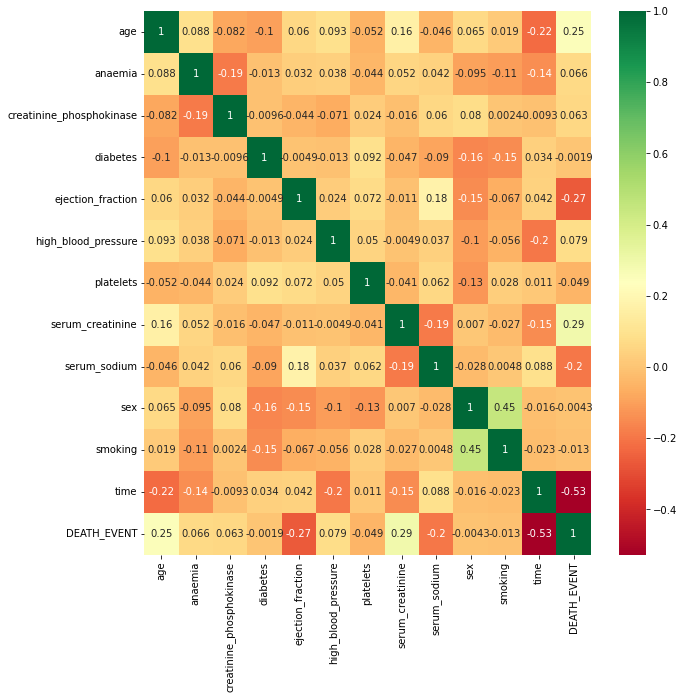

In [6]:
cm = df.corr()
cm
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap="RdYlGn")

The heatmaps highlight the features: age, ejection fraction, serum creatinine, serum sodium, and time as having a strong relationship with the death event outcome.

<AxesSubplot:>

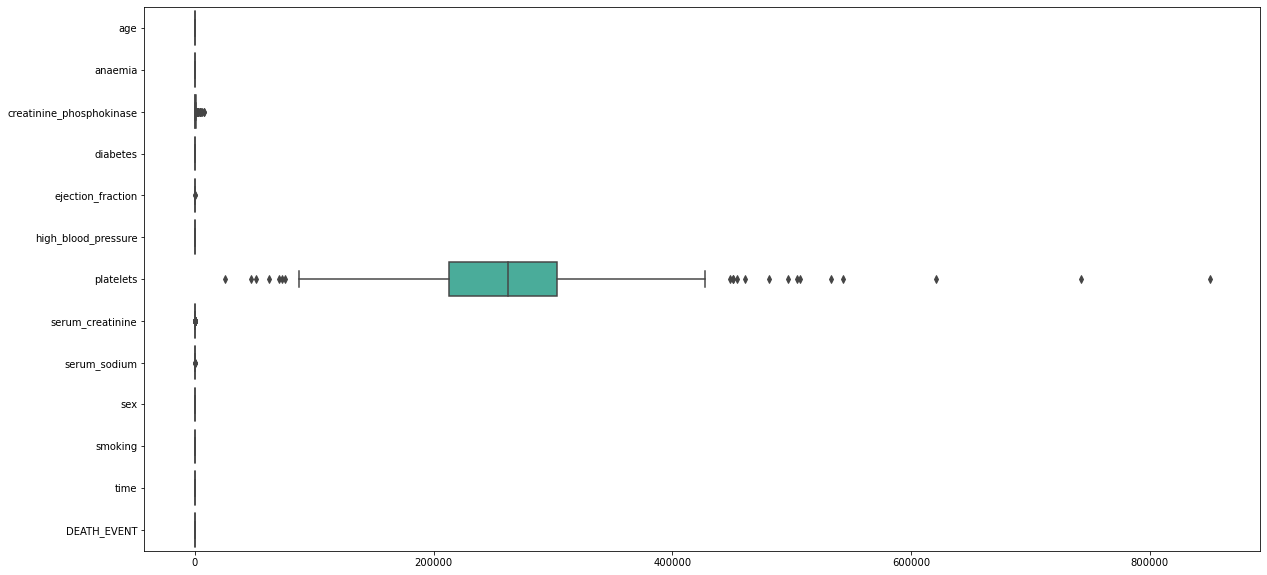

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot( data = df, orient="h")

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Mean age is 60.833 with a min of 40 and a max of 95. All data points are of adults in middle to older age groups.

# Dependent & Indepenent Variables

In [10]:
X=df.drop(['DEATH_EVENT'],axis=1)
y=df['DEATH_EVENT']

In [11]:
###Splitting data to train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2,shuffle=True)

# Build the Model using classification algorithms

### 1) Random Forest

In [12]:
#RF = RandomForestClassifier(n_estimators = 10, max_depth = 6, random_state = 2)
RF= RandomForestClassifier(criterion='entropy')
RF.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy')

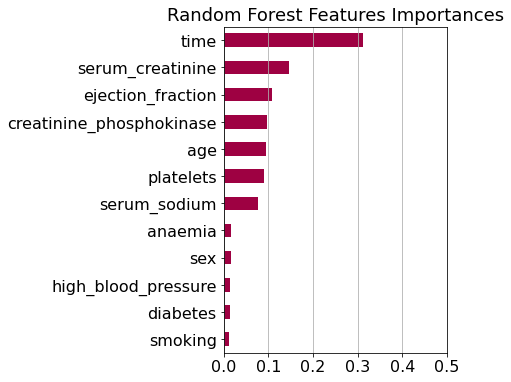

<Figure size 432x288 with 0 Axes>

In [13]:
#Plot Random Forest Features by order of Importance
plt.figure(figsize=(4,6))
feat_importances = pd.Series(RF.feature_importances_, df.drop('DEATH_EVENT', axis=1).columns)
feat_importances.nsmallest(12).plot(kind='barh',cmap=plt.cm.Spectral)

plt.xlim((0,0.5))
plt.grid(axis='x')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Random Forest Features Importances',fontdict={'fontsize': 18})
plt.show()

plt.clf()

The most important features of the random forest for making death_event predictions were time, serum_creatinine, Ejection_fraction and age, with time being the most important.

### 2) Decision Tree

In [14]:
#classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
#DT= DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)

DT=DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
DT_scores = []
for i in range(1, len(X.columns) + 1):
    DT_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    DT_classifier.fit(X_train, y_train)
    DT_scores.append(DT_classifier.score(X_test, y_test))
     

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

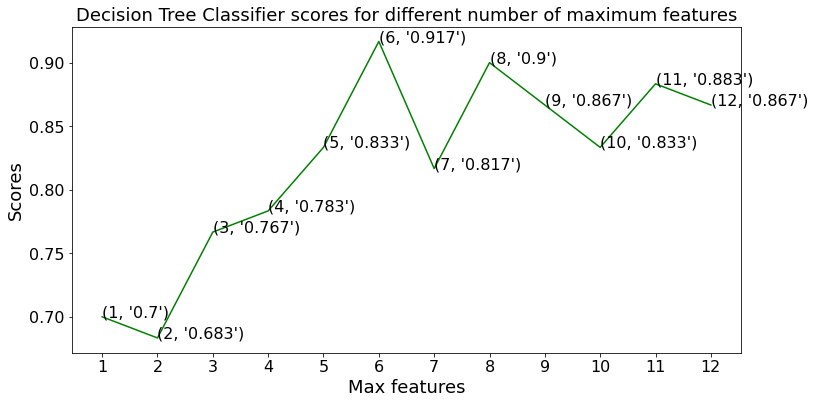

In [16]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(1, len(X.columns) + 1)], DT_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, DT_scores[i-1], (i,"{0:.3}".format(DT_scores[i-1])),fontsize = 16)
plt.xticks([i for i in range(1, len(X.columns) + 1)],fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Max features',fontdict={'fontsize': 18})
plt.ylabel('Scores',fontdict={'fontsize': 18})
plt.title('Decision Tree Classifier scores for different number of maximum features',fontdict={'fontsize': 18})
     

In [17]:
df_copy = df.copy()
#change column types so only numerical columns print out

for col in ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']:
    df_copy[col] = df_copy[col].astype('category')
    
col_names = ['age', 'anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']
     

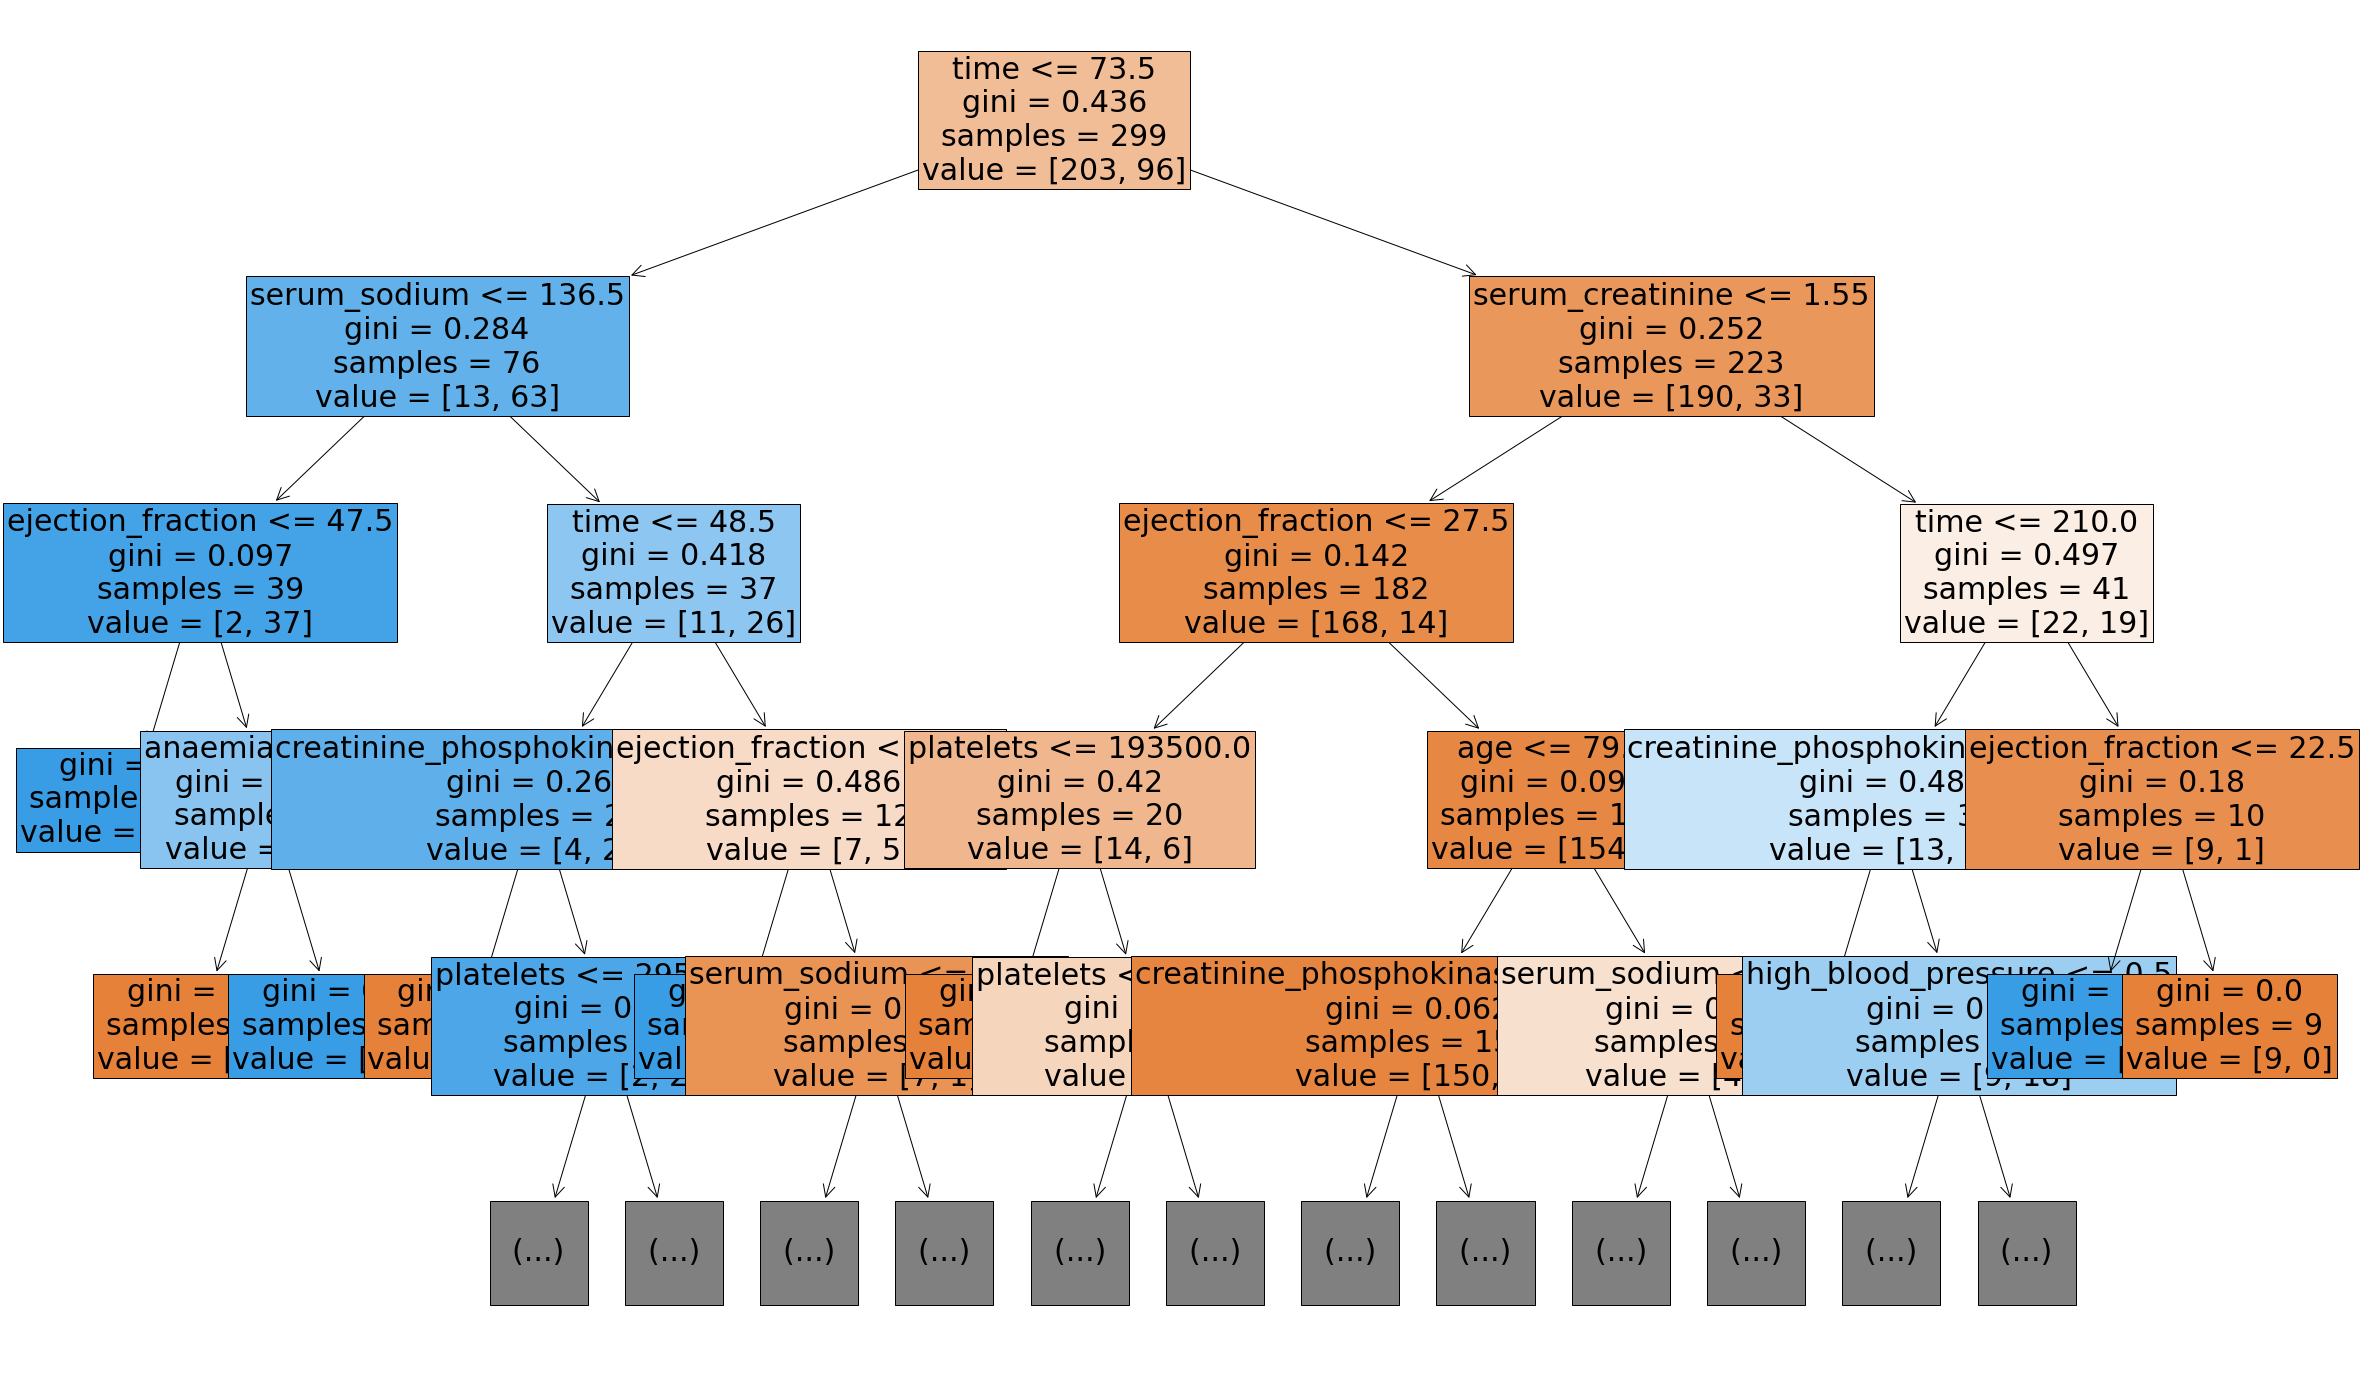

In [18]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
text_representation = tree.export_text(clf)
fig, ax = plt.subplots(figsize=(40, 25))
tree.plot_tree(model, max_depth=4, fontsize=30, feature_names=col_names, filled=True)
plt.show()
     

The visual of the Decision tree indicates indicates that time, ejection fraction, and serum_creatine are the best predictors of heart attack survival as they are higher on the tree with gini scores that are not close to 0 or 1 indicating more equal split between classes.

### 3)Logistic Regression

In [19]:
#logistic = LogisticRegression(solver='liblinear',n_jobs=-1,random_state=0)
logistic = LogisticRegression(solver='liblinear',multi_class='ovr')
logistic.fit(X_train,y_train)


LogisticRegression(multi_class='ovr', solver='liblinear')

### 4)KNN

In [20]:
#KNeighborsClassifier Model
#knn = KNeighborsClassifier(n_neighbors = 10)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

### 5) SVC

In [21]:
#svc = SVC(kernel = 'linear',max_iter=10,C=1,random_state=0)
#scores = cross_val_score(svc,X_train,y_train,cv=20)

svm=SVC()
svm.fit(X_train,y_train)

SVC()

### 6) Naive bayes classifier

In [22]:
from sklearn.naive_bayes import GaussianNB  
NaiveB = GaussianNB()  
NaiveB.fit(X_train,y_train)

GaussianNB()

## Predictions

###### Making predictions on test dataset

In [23]:
RF_pred= RF.predict(X_test)
DT_pred= DT.predict(X_test)
logistic_pred= logistic.predict(X_test)
knn_pred= knn.predict(X_test)
svm_pred= svm.predict(X_test)
naive_pred= NaiveB.predict(X_test)



# Calculating the Model accuracy & Model Evaluation Technique

## Random Forest

In [24]:
print(" Train Accuracy of Random Forest  ",RF.score(X_train,y_train)*100)
print(" Testing Accuracy of Random Forest  ",RF.score(X_test,y_test)*100)
print("  Accuracy of Random Forest  ",accuracy_score(y_test,RF_pred)*100)
print("precision score ",precision_score(y_test,RF_pred))
print("f1_score ",f1_score(y_test,DT_pred))
print("recall ",recall_score(y_test,RF_pred))
cm1 = confusion_matrix(y_test,RF_pred)
print(cm1)

 Train Accuracy of Random Forest   100.0
 Testing Accuracy of Random Forest   95.0
  Accuracy of Random Forest   95.0
precision score  1.0
f1_score  0.7647058823529412
recall  0.8235294117647058
[[43  0]
 [ 3 14]]


## Decision Tree

In [25]:
print(" Train Accuracy of Decision Tree  ",DT.score(X_train,y_train)*100)
print(" Testing Accuracy of Decision Tree  ",DT.score(X_test,y_test)*100)
print("  Accuracy of Decision Tree  ",accuracy_score(y_test,DT_pred)*100)
print("precision score ",precision_score(y_test,DT_pred))
print("recall ",recall_score(y_test,DT_pred))
print("f1_score ",f1_score(y_test,DT_pred))
cm2 = confusion_matrix(y_test,DT_pred)
print(cm2)

 Train Accuracy of Decision Tree   100.0
 Testing Accuracy of Decision Tree   86.66666666666667
  Accuracy of Decision Tree   86.66666666666667
precision score  0.7647058823529411
recall  0.7647058823529411
f1_score  0.7647058823529412
[[39  4]
 [ 4 13]]


## Logistic Regression

In [26]:
print(" Train Accuracy of Logistic Regression ",logistic.score(X_train,y_train)*100)
print(" Testing Accuracy of Logistic Regression ",logistic.score(X_test,y_test)*100)
print("  Accuracy of Logistic Regression ",accuracy_score(y_test,logistic_pred)*100)
print("precision score ",precision_score(y_test,logistic_pred))
print("recall ",recall_score(y_test,logistic_pred))
print("f1_score ",f1_score(y_test,logistic_pred))
cm3 = confusion_matrix(y_test,logistic_pred)
print(cm3)


 Train Accuracy of Logistic Regression  82.00836820083683
 Testing Accuracy of Logistic Regression  86.66666666666667
  Accuracy of Logistic Regression  86.66666666666667
precision score  0.8
recall  0.7058823529411765
f1_score  0.7500000000000001
[[40  3]
 [ 5 12]]


## KNN

In [27]:
print(" Train Accuracy of KNN ",knn.score(X_train,y_train)*100)
print(" Testing Accuracy of KNN ",knn.score(X_test,y_test)*100)
print("  Accuracy of KNN ",accuracy_score(y_test,knn_pred)*100)
print("precision score ",precision_score(y_test,knn_pred))
print("recall ",recall_score(y_test,knn_pred))
print("f1_score ",f1_score(y_test,knn_pred))
cm4 = confusion_matrix(y_test,knn_pred)
print(cm4)

 Train Accuracy of KNN  75.73221757322176
 Testing Accuracy of KNN  66.66666666666666
  Accuracy of KNN  66.66666666666666
precision score  0.36363636363636365
recall  0.23529411764705882
f1_score  0.2857142857142857
[[36  7]
 [13  4]]


## Support Vector Machine(SVM)

In [28]:
print(" Train Accuracy of SVM  ",svm.score(X_train,y_train)*100)
print(" Testing Accuracy of SVM  ",svm.score(X_test,y_test)*100)
print("  Accuracy of SVM  ",accuracy_score(y_test,svm_pred)*100)
print("precision score ",precision_score(y_test,svm_pred))
print("recall ",recall_score(y_test,svm_pred))
print("f1_score ",f1_score(y_test,svm_pred))
cm5 = confusion_matrix(y_test,svm_pred)
print(cm5)

 Train Accuracy of SVM   66.94560669456067
 Testing Accuracy of SVM   71.66666666666667
  Accuracy of SVM   71.66666666666667
precision score  0.0
recall  0.0
f1_score  0.0
[[43  0]
 [17  0]]


C:\Users\DELL\anaconda3\envs\yogita\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes classifier

In [29]:
print(" Train Accuracy of Naive Bayes ",NaiveB.score(X_train,y_train)*100)
print(" Testing Accuracy of Naive Bayes ",NaiveB.score(X_test,y_test)*100)
print("  Accuracy of Naive Bayes ",accuracy_score(y_test,naive_pred)*100)
print("precision score ",precision_score(y_test,naive_pred))
print("recall ",recall_score(y_test,naive_pred))
print("f1_score ",f1_score(y_test,naive_pred))
cm6 = confusion_matrix(y_test,naive_pred)
print(cm6)


 Train Accuracy of Naive Bayes  79.49790794979079
 Testing Accuracy of Naive Bayes  83.33333333333334
  Accuracy of Naive Bayes  83.33333333333334
precision score  0.7692307692307693
recall  0.5882352941176471
f1_score  0.6666666666666667
[[40  3]
 [ 7 10]]


# AUC ROC Curve

In [30]:
##   Auc And Ruc Curve

# predict probabilities
pred_prob1 = RF.predict_proba(X_test)
pred_prob2 = DT.predict_proba(X_test)
pred_prob3 = logistic.predict_proba(X_test)

In [31]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [32]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3  )

0.9528043775649795 0.8358413132694938 0.9220246238030095


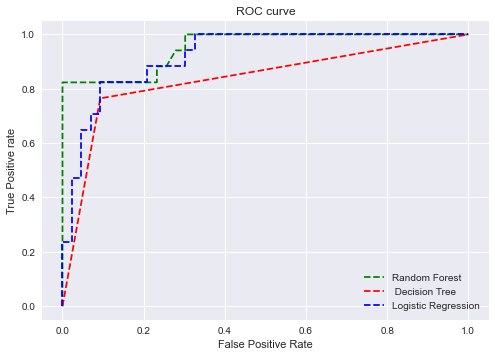

In [33]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label=' Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Logistic Regression')
#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Summary

Of the 6 models implemented the one with the best accuracy score was the Random Forest Model. It had an accuracy of 95. Meaning that it correctly predicted the death_event.